In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [3]:
datos = pd.read_csv('C:/Users/JCfor/Desktop/Proyecto Tesis I/DATOSFMv03.csv')
##Variable valor de traspaso
valor = datos['Valor de traspaso'].str.split('-',expand = True)
valor.columns = ['MenorV', 'V_traspaso']
datos = pd.concat( [ datos,valor.V_traspaso ] , axis= 1)

##Variable Sueldo
datos['Sueldo'] = datos['Sueldo'].str.extract('(\d+)', expand=False).astype(float)
datos['Sueldo'] = datos['Sueldo']*1000
datos.head()

datos = datos.drop( ['Inf', 'Source.Name', 'Rec', 'Nombre', 'Club', 'División', 'Posición', 'Edad', 'Sueldo', 'V_traspaso','Valor de traspaso' ], axis=1)
#datos.describe().columns
#datos.to_excel('data.xlsx')

In [4]:
datos['Valoracion'].replace(' ',np.nan, inplace = True)
datos.dropna(subset=['Valoracion'], inplace = True)
#datos.info()

In [5]:
x = np.asanyarray(datos.drop(columns=['Valoracion']))
#y = np.asanyarray(datos[['Valoracion']])
y=datos['Valoracion']
#x = StandardScaler().fit_transform(x)

print(x.shape)
print(y.shape)

(2098, 47)
(2098,)


In [6]:
#https://medium.com/analytics-vidhya/what-is-random-state-in-machine-learning-84c1c9dffaad
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=3)
#y_test.shape
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=32)

In [7]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

In [11]:
modelo_autor = keras.Sequential([
    keras.layers.Dense(6, activation='sigmoid', input_shape=(47,)),
    keras.layers.Dense(1)
])

sgd = tf.keras.optimizers.SGD(learning_rate=0.1,
momentum=0.5)

modelo_autor.compile(optimizer = sgd,
               loss='mse',
               metrics=['mae'])

In [12]:
#https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network
history_autor = modelo_autor.fit(x_train, y_train, epochs= 300, batch_size= 32, validation_data= (x_test, y_test))

Epoch 1/300
53/53 [==============================] - 0s 3ms/step - loss: 378.8943 - mae: 16.3474 - val_loss: 269.1263 - val_mae: 15.1335
Epoch 2/300
53/53 [==============================] - 0s 3ms/step - loss: 340.4208 - mae: 15.9524 - val_loss: 349.9147 - val_mae: 16.7438
Epoch 3/300
53/53 [==============================] - 0s 1ms/step - loss: 336.7914 - mae: 15.9040 - val_loss: 339.7836 - val_mae: 15.4437
Epoch 4/300
53/53 [==============================] - 0s 1ms/step - loss: 281.2806 - mae: 13.9230 - val_loss: 247.4883 - val_mae: 13.7990
Epoch 5/300
53/53 [==============================] - 0s 1ms/step - loss: 150.4465 - mae: 9.7022 - val_loss: 159.9906 - val_mae: 9.5022
Epoch 6/300
53/53 [==============================] - 0s 1ms/step - loss: 134.2504 - mae: 8.8898 - val_loss: 121.9551 - val_mae: 8.4220
Epoch 7/300
53/53 [==============================] - 0s 2ms/step - loss: 137.3843 - mae: 8.9139 - val_loss: 116.6290 - val_mae: 8.7131
Epoch 8/300
53/53 [============================

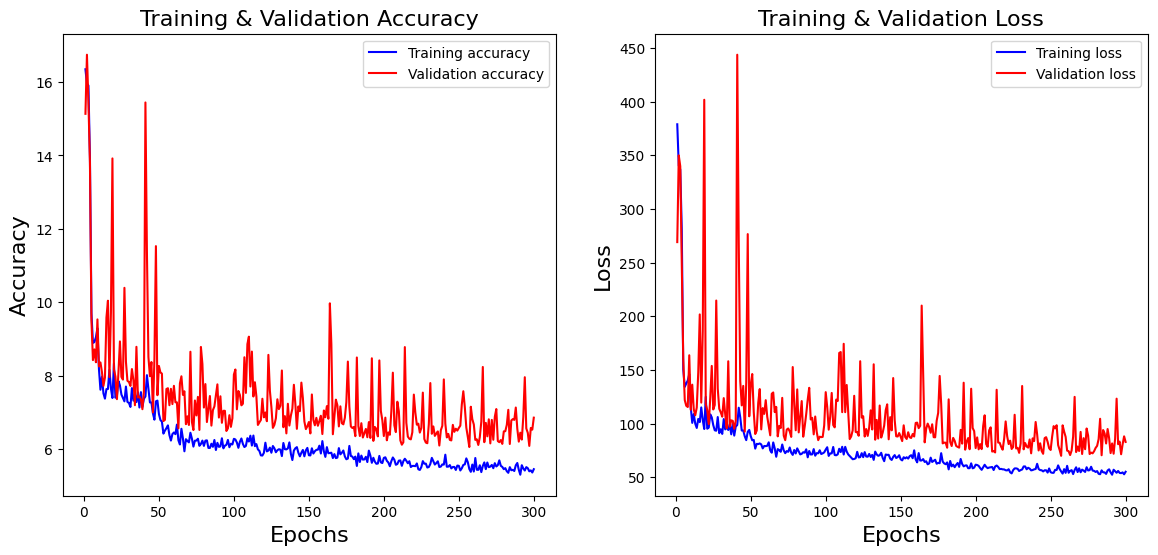

In [13]:
import matplotlib.pyplot as plt
 
history_dict2 = history_autor.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']
accuracy2 = history_dict2['mae']
val_accuracy2 = history_dict2['val_mae']
 
epochs2 = range(1, len(loss_values2) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs2, accuracy2, 'b', label='Training accuracy')
ax[0].plot(epochs2, val_accuracy2, 'r', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs2, loss_values2, 'b', label='Training loss')
ax[1].plot(epochs2, val_loss_values2, 'r', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()